## Propagación de la afinidad y k-medoides

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generación de datos de ejemplo

In [2]:
from sklearn.datasets import make_blobs

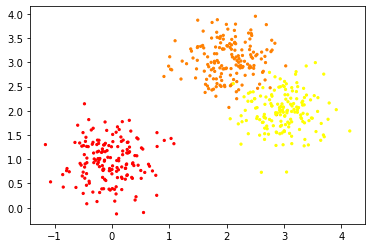

In [3]:
centers = [[0,1], [2,3], [3,2]]
data, labels = make_blobs(n_samples=500, centers=centers, cluster_std=0.4, random_state=1000)

plt.scatter(data[:,0], data[:,1], c=labels, s = 5, cmap = "autumn")

## Propagación de la afinidad

In [12]:
def report_affinity_propagation(X, dampling = -10):
    from sklearn.cluster import AffinityPropagation
    from sklearn import metrics
    from itertools import cycle
    
    af = AffinityPropagation(preference=dampling, random_state=1000).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    #print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()
    
    return n_clust, clust_labels

Número estimado de clusters: 8
Homogeneidad: 0.926
Completitud: 0.508
V-measure: 0.656
R2 ajustado: 0.461
Información mútua ajustada: 0.653


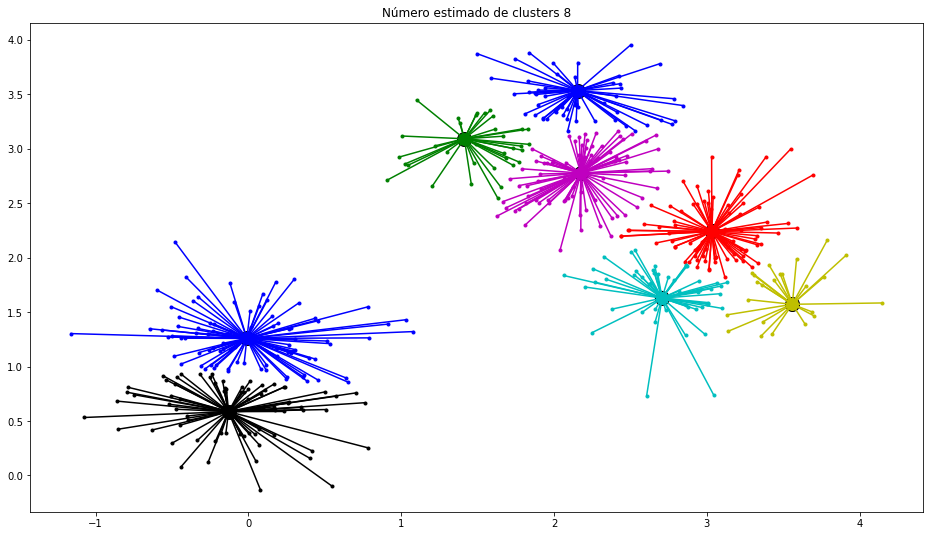

In [13]:
n_clust, clust_labels = report_affinity_propagation(data, -10)

## K-medoides

In [8]:
from pyclust import KMedoids

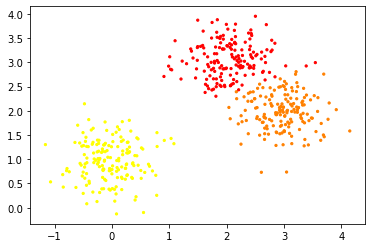

In [11]:
kmedoidsmodel = KMedoids(3).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmedoidsmodel, s=5, cmap="autumn")

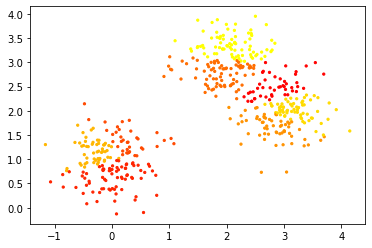

In [14]:
kmedoidsmodel = KMedoids(n_clust).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmedoidsmodel, s=5, cmap="autumn")